<a href="https://colab.research.google.com/github/sametgumus212/Python/blob/master/d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-08-15 20:56:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   191MB/s    in 0.4s    

2020-08-15 20:56:18 (191 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/My Drive/db2/processed_pIC50.csv")
data

,ChEMBL ID,SMILES,MolWt,NumRotatableBonds,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2103749,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,2180.317,66.0,28.0,29.0,0.090635
1,CHEMBL1201199,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,1209.421,32.0,16.0,14.0,0.910650
2,CHEMBL1201247,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,1269.433,31.0,17.0,16.0,0.507840
3,CHEMBL557217,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,1811.253,51.0,20.0,16.0,0.312685
4,CHEMBL1429,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,1069.238,19.0,14.0,15.0,0.383837
...,...,...,...,...,...,...,...
7457,CHEMBL2104130,[Ca++].[O-]C(=O)CCCCCCCCC=C.[O-]C(=O)CCCCCCCCC=C,406.620,18.0,0.0,4.0,0.431165
7458,CHEMBL1532734,CC(=O)O[Al](O)OC(C)=O,162.077,2.0,1.0,5.0,1.000000
7459,CHEMBL3759231,ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O,227.006,0.0,0.0,4.0,0.931384
7460,CHEMBL2016757,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,291.267,2.0,4.0,9.0,0.731254


In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

(1,)
1+[O)C=@cH]2(N
50


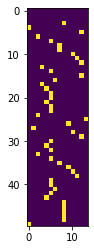

In [ ]:

from SmilesEnumerator import SmilesEnumerator
sme = SmilesEnumerator()
#print help(SmilesEnumerator)
sme

import numpy as np
smiles = np.array(["CCC(=O)O[C@@]1(CC[NH+](C[C@H]1CC=C)C)c2ccccc2"])
print(smiles.shape)
sme.fit(smiles)
print(sme.charset)
print(sme.pad)
import matplotlib.pyplot as plt
%matplotlib inline
vect = sme.transform(smiles)
plt.imshow(vect[0])

In [ ]:
data["SMILES"]

0       CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1       CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...
2       CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
3       CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
4       NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
                              ...                        
7457     [Ca++].[O-]C(=O)CCCCCCCCC=C.[O-]C(=O)CCCCCCCCC=C
7458                                CC(=O)O[Al](O)OC(C)=O
7459                     ClC1=C(Cl)C(=O)C(C#N)=C(C#N)C1=O
7460    NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...
7461    CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...
Name: SMILES, Length: 7462, dtype: object

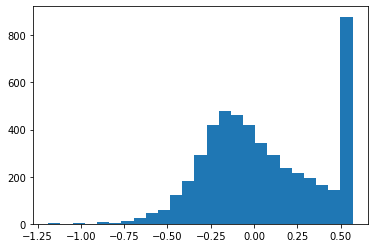

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(data["SMILES"],  data["pIC50"].values.reshape(-1,1), test_size=0.33,random_state=42)
#X_train=yen["SMILES"]
#X_test=np.log10(yen["MolLogP"]).values.reshape(-1,1)
from sklearn.preprocessing import RobustScaler

#y_test=random_state=42
rbs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(5.0, 95.0), copy=True)
y_train = rbs.fit_transform(y_train)
y_test = rbs.transform(y_test)
_ = plt.hist(y_train, bins=25)

In [ ]:
import keras.backend as K
from SmilesEnumerator import SmilesIterator
#The SmilesEnumerator must be fit to the entire dataset, so that all chars are registered
sme.fit(data["SMILES"])
sme.leftpad = True
print(sme.charset)
print(sme.pad)
#The dtype is set for the K.floatx(), which is the numerical type configured for Tensorflow or Theano
generator = SmilesIterator(X_train, y_train, sme, batch_size=200, dtype=K.floatx())

1KOstS8@i\P+V[-bMu)/0B4Xc.Rle(#Goagd7Z=F%TI236A9n5rCLH]N
1531


In [ ]:
X,y = generator.next()
print(X.shape)
print(y.shape)

(200, 1531, 56)
(200, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.core import Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras.optimizers import RMSprop, Adam

In [ ]:
input_shape = X.shape[1:]
output_shape = 1

model = Sequential()
model.add(LSTM(64,
               input_shape=input_shape,
               dropout = 0.19
               #unroll= True
              ))
model.add(Dense(output_shape,
                kernel_regularizer=regularizers.l1_l2(0.005,0.01),
                activation="linear"))

model.compile(loss="mse", optimizer=RMSprop(lr=0.005))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                30976     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 31,041
Trainable params: 31,041
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit_generator(generator, steps_per_epoch=100, epochs=25, workers=4)

Epoch 1/25
100/100 [==============================] - 271s 3s/step - loss: 0.0603
Epoch 2/25
100/100 [==============================] - 269s 3s/step - loss: 0.0606
Epoch 3/25
100/100 [==============================] - 270s 3s/step - loss: 0.0538
Epoch 4/25
100/100 [==============================] - 270s 3s/step - loss: 0.0572
Epoch 5/25
100/100 [==============================] - 271s 3s/step - loss: 0.0510
Epoch 6/25
100/100 [==============================] - 271s 3s/step - loss: 0.0605
Epoch 7/25
100/100 [==============================] - 269s 3s/step - loss: 0.0646
Epoch 8/25
100/100 [==============================] - 272s 3s/step - loss: 0.0581
Epoch 9/25
100/100 [==============================] - 272s 3s/step - loss: 0.0883
Epoch 10/25
100/100 [==============================] - 273s 3s/step - loss: 0.0524
Epoch 11/25
100/100 [==============================] - 271s 3s/step - loss: 0.0615
Epoch 12/25
100/100 [==============================] - 273s 3s/step - loss: 0.0453
Epoch 13/25
1

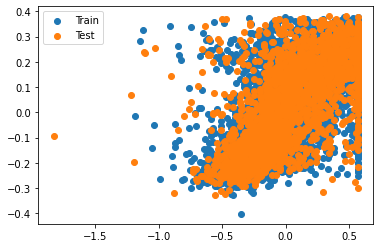

In [ ]:
y_pred_train = model.predict(sme.transform(X_train))
y_pred_test = model.predict(sme.transform(X_test))
plt.scatter(y_train, y_pred_train, label="Train")
plt.scatter(y_test, y_pred_test, label="Test")
plt.legend()

In [ ]:
i = 1

y_true = y_test[i]
y_pred = model.predict(sme.transform(X_test.iloc[i:i+1]))
print(y_true - y_pred)

[[0.10965026]]


0.051397093
[0.10860751]


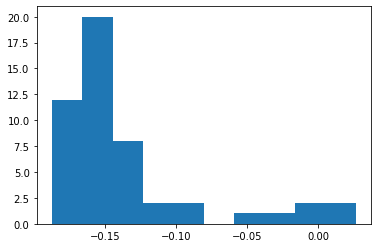

In [ ]:
smiles_repeat = np.array([X_test.iloc[i:i+1].values[0]]*50)
y_pred = model.predict(sme.transform(smiles_repeat))
print(y_pred.std())
print(y_true - np.median(y_pred))
_ = plt.hist(y_pred)

2.deneme step epoch20  , epoch 15

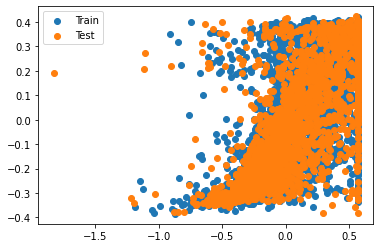

In [ ]:
y_pred_train = model.predict(sme.transform(X_train))
y_pred_test = model.predict(sme.transform(X_test))
plt.scatter(y_train, y_pred_train, label="Train")
plt.scatter(y_test, y_pred_test, label="Test")
plt.legend()

In [ ]:
i = 1

y_true = y_test[i]
y_pred = model.predict(sme.transform(X_test.iloc[i:i+1]))
print(y_true - y_pred)

[[0.17001631]]


0.024579398
[0.19931927]


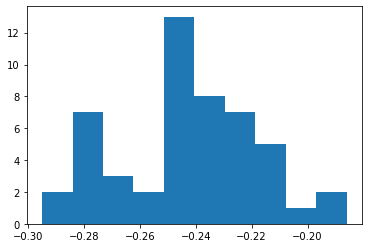

In [ ]:
smiles_repeat = np.array([X_test.iloc[i:i+1].values[0]]*50)
y_pred = model.predict(sme.transform(smiles_repeat))
print(y_pred.std())
print(y_true - np.median(y_pred))
_ = plt.hist(y_pred)

3. deneme 100step epoch , 25 epoch

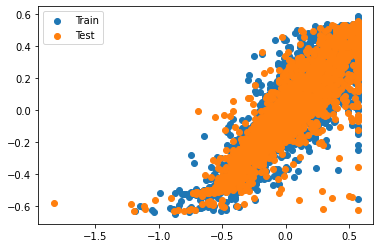

In [21]:
y_pred_train = model.predict(sme.transform(X_train))
y_pred_test = model.predict(sme.transform(X_test))
plt.scatter(y_train, y_pred_train, label="Train")
plt.scatter(y_test, y_pred_test, label="Test")
plt.legend()

In [22]:
i = 1

y_true = y_test[i]
y_pred = model.predict(sme.transform(X_test.iloc[i:i+1]))
print(y_true - y_pred)

[[0.17884452]]


0.024739025
[0.14356839]


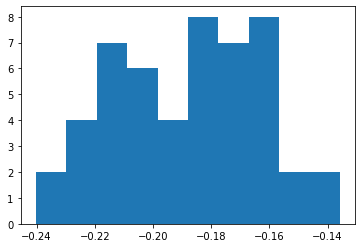

In [23]:
smiles_repeat = np.array([X_test.iloc[i:i+1].values[0]]*50)
y_pred = model.predict(sme.transform(smiles_repeat))
print(y_pred.std())
print(y_true - np.median(y_pred))
_ = plt.hist(y_pred)